In [1]:
import matplotlib.pyplot as plt
from PrefixTrie import *
from Solver import *
import tracemalloc
import random
import time

In [2]:
# For Task 1:
tracemalloc.start()
solve_task1("INPUT/input1.dat", "OUTPUT/output1.dat")
current, peak = tracemalloc.get_traced_memory()
print(f"Використано пам’яті: {current / 1024**2:.4f} MB (пік: {peak / 1024**2:.4f} MB)")
tracemalloc.stop()

tracemalloc.start()
solve_task1("INPUT/input2.dat", "OUTPUT/output2.dat")
current, peak = tracemalloc.get_traced_memory()
print(f"Використано пам’яті: {current / 1024**2:.4f} MB (пік: {peak / 1024**2:.4f} MB)")
tracemalloc.stop()

Використано пам’яті: 0.0033 MB (пік: 0.0206 MB)
Використано пам’яті: 0.0036 MB (пік: 0.0209 MB)


In [46]:
# For Task 2:
tracemalloc.start()
solve_task2("INPUT/input3.dat", "OUTPUT/output3.dat")
current, peak = tracemalloc.get_traced_memory()
print(f"Використано пам’яті: {current / 1024**2:.4f} MB (пік: {peak / 1024**2:.4f} MB)")
tracemalloc.stop()

tracemalloc.start()
solve_task2("INPUT/input4.dat", "OUTPUT/output4.dat")
current, peak = tracemalloc.get_traced_memory()
print(f"Використано пам’яті: {current / 1024**2:.4f} MB (пік: {peak / 1024**2:.4f} MB)")
tracemalloc.stop()

tracemalloc.start()
solve_task2("INPUT/input5.dat", "OUTPUT/output5.dat")
current, peak = tracemalloc.get_traced_memory()
print(f"Використано пам’яті: {current / 1024**2:.4f} MB (пік: {peak / 1024**2:.4f} MB)")
tracemalloc.stop()


Використано пам’яті: 0.0015 MB (пік: 0.0188 MB)
Використано пам’яті: 0.0014 MB (пік: 0.0187 MB)
Використано пам’яті: 0.0015 MB (пік: 0.0188 MB)


In [4]:
pattern_sizes   = list(i*5 for i in range(1, 21))
pattern_numbers = list(i*5 for i in range(1, 21))

In [9]:
input_test_data = """AGTAAA
3
A
GTA
AG"""
solve_task2(input_file=input_test_data, write2file=False, read_from_file=False)

'0 1 3 4 5'

In [5]:
alphabet = ["A", "T", "G", "C"]
def generate_task1(pattern_number: int, pattern_size: int):
    result = str(pattern_number) + "\n"
    for _ in range(pattern_number):
        result += "".join(random.choices(alphabet, k=pattern_size)) + "\n"
    return result

def generate_task2(pattern_number: int, pattern_size: int):
    # Генеруємо текст максимальної довжини (згідно умови)
    result = "".join(random.choices(alphabet, k=10_000)) + "\n"
    result += str(pattern_number) + "\n"
    for i in range(pattern_number):
        result += "".join(random.choices(alphabet, k=pattern_size)) + "\n"
    return result

print(generate_task1(2, 2))

2
GT
TG



In [6]:
graph_time = []
graph_mem = []

for pattern_number in pattern_numbers:
    for pattern_size in pattern_sizes:
        result_mem = 0
        result_time = 0
        tracemalloc.start()
        for _ in range(10):
            input_data = generate_task1(pattern_number=pattern_number,
                                        pattern_size=pattern_size)
            start_time = time.time()
            solve_task1(input_file=input_data, write2file=False, read_from_file=False)
            result_time += time.time() - start_time

        graph_time.append(result_time / 10)
        _, peak = tracemalloc.get_traced_memory()
        graph_mem.append(peak / 10)
        tracemalloc.stop()


Text(0.5, 1.0, 'Час (секунди)')

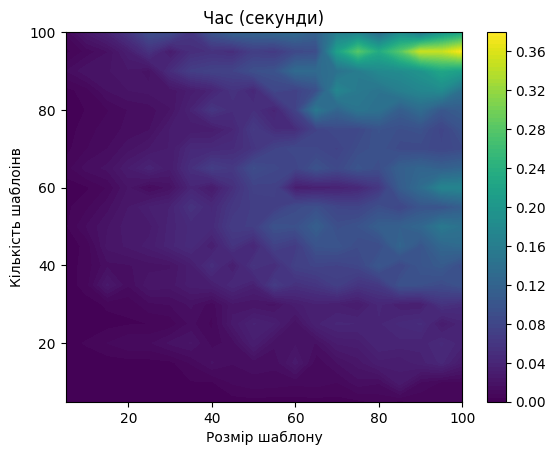

In [38]:
t1t = plt.contourf(pattern_numbers, pattern_sizes, 
                   [graph_time[(i - 1)*20:i*20]for i in range(1, 21)], 
                   100)
plt.colorbar(t1t)
plt.xlabel("Розмір шаблону")
plt.ylabel("Кількість шаблоінв")
plt.title("Час (секунди)")

Text(0.5, 1.0, "Пам'ять (у байтах)")

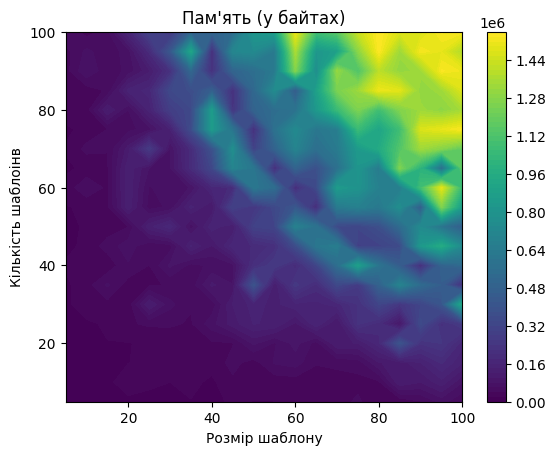

In [39]:
t1t = plt.contourf(pattern_numbers, pattern_sizes, 
                   [graph_mem[(i - 1)*20:i*20]for i in range(1, 21)], 
                   100)
plt.colorbar(t1t)
plt.xlabel("Розмір шаблону")
plt.ylabel("Кількість шаблоінв")
plt.title("Пам'ять (у байтах)")

In [8]:
graph_time2 = []
graph_mem2 = []

for pattern_number in pattern_numbers:
    for pattern_size in pattern_sizes:
        result_mem = 0
        result_time = 0
        tracemalloc.start()
        for _ in range(10):
            input_data = generate_task1(pattern_number=pattern_number,
                                        pattern_size=pattern_size)
            start_time = time.time()
            solve_task1(input_file=input_data, write2file=False, read_from_file=False)
            result_time += time.time() - start_time

        graph_time2.append(result_time / 10)
        _, peak = tracemalloc.get_traced_memory()
        graph_mem2.append(peak / 10)
        tracemalloc.stop()

Text(0.5, 1.0, 'Час (секунди)')

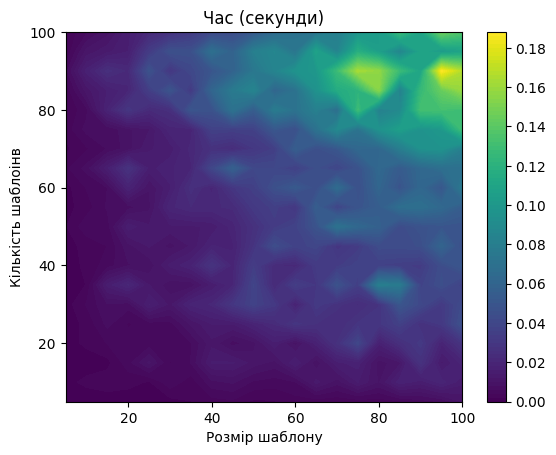

In [44]:
t1t = plt.contourf(pattern_numbers, pattern_sizes, 
                   [graph_time2[(i - 1)*20:i*20]for i in range(1, 21)], 
                   100)
plt.colorbar(t1t)
plt.xlabel("Розмір шаблону")
plt.ylabel("Кількість шаблоінв")
plt.title("Час (секунди)")

Text(0.5, 1.0, "Пам'ять (у байтах)")

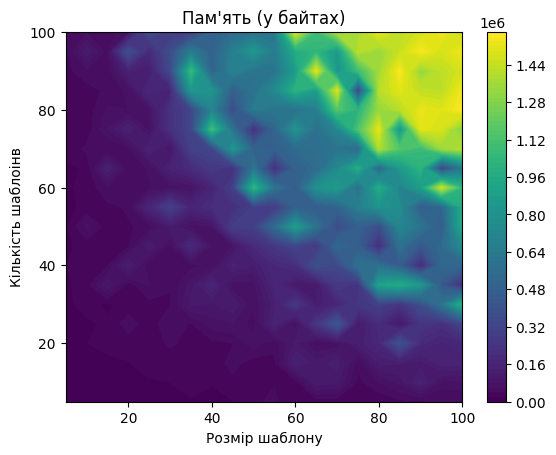

In [45]:
t1t = plt.contourf(pattern_numbers, pattern_sizes, 
                   [graph_mem2[(i - 1)*20:i*20]for i in range(1, 21)], 
                   100)
plt.colorbar(t1t)
plt.xlabel("Розмір шаблону")
plt.ylabel("Кількість шаблоінв")
plt.title("Пам'ять (у байтах)")